In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [287]:
data_path = "Salary_Data.csv"
DATA = pd.read_csv(data_path)
DATA.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [288]:
DATA.rename({"YearsExperience" : "YearsExperience (YE)"}, axis = 1, inplace = True)
DATA.rename({"Salary" : "Salary (Sal)"}, axis = 1, inplace = True)
DATA

,YearsExperience (YE),Salary (Sal)
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [289]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience (YE)    30 non-null float64
Salary (Sal)            30 non-null float64
dtypes: float64(2)
memory usage: 520.0 bytes


In [290]:
DATA.shape

(30, 2)

<function matplotlib.pyplot.show(*args, **kw)>

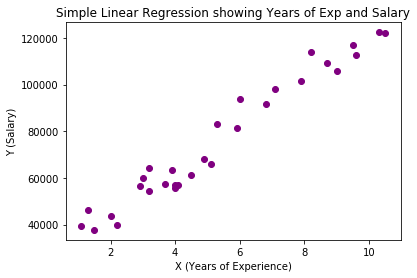

In [291]:
plt.scatter(X, Y, color = "purple")
plt.title("Simple Linear Regression showing Years of Exp and Salary")
plt.xlabel("X (Years of Experience)")
plt.ylabel("Y (Salary)")
plt.show

In [292]:
DATA_T = DATA.iloc[ : -4, : ]
DATA_T

,YearsExperience (YE),Salary (Sal)
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [293]:
DATA_TT = DATA.iloc[26: , : ]
DATA_TT

,YearsExperience (YE),Salary (Sal)
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [294]:
#Years of experience = YE_train
#Salary = Sal_train

YE_train = DATA_T.iloc[ : , : -1].values
Sal_train = DATA_T.iloc[ : , 1].values
print("Train Input feature, YE_train = ", YE_train, "\n Shape of YE_train = ", YE_train.shape) 
print("\n Train Input Target, Sal_train = ", Sal_train, " \n\n Shape of Sal_train = ", Sal_train.shape)

YE_test = DATA_TT.iloc[ : ,  : -1].values
Sal_test = DATA_TT.iloc[ : , -1].values

Train Input feature, YE_train =  [[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]
 [2.9]
 [3. ]
 [3.2]
 [3.2]
 [3.7]
 [3.9]
 [4. ]
 [4. ]
 [4.1]
 [4.5]
 [4.9]
 [5.1]
 [5.3]
 [5.9]
 [6. ]
 [6.8]
 [7.1]
 [7.9]
 [8.2]
 [8.7]
 [9. ]] 
 Shape of YE_train =  (26, 1)

 Train Input Target, Sal_train =  [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582.]  

 Shape of Sal_train =  (26,)


In [ ]:
#from sklearn.model_selection import train_test_split

#X_train,X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [295]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(YE_train, Sal_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [296]:
regressor.score(YE_train, Sal_train)

0.9329014775674878

In [297]:
print(regressor.intercept_)

24812.705710761198


In [298]:
regressor.coef_

array([9716.25649808])

In [300]:
cor = DATA.corr()
print(cor)

                      YearsExperience (YE)  Salary (Sal)
YearsExperience (YE)              1.000000      0.978242
Salary (Sal)                      0.978242      1.000000


# Ques 1) What linear regression equation best estimates Salary, based on Experience?

# Ans : Y_hat = 24812.71 + 9716.26X

In [301]:
Y_pred = regressor.predict(YE_train)

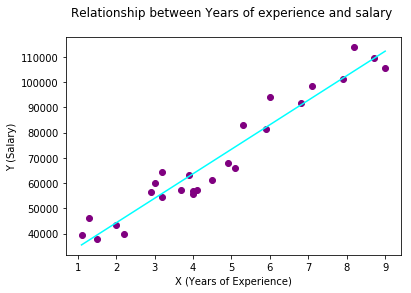

In [302]:
plt.scatter(YE_train, Sal_train, color = "purple")
plt.plot(YE_train, Y_pred, color = "cyan")
plt.title("Relationship between Years of experience and salary \n")
plt.xlabel("X (Years of Experience)")
plt.ylabel("Y (Salary)")

plt.show()

In [303]:
DATA_T["Sal_pred"] = Y_pred
DATA_T

C:\Users\TheForbesMaterial\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,YearsExperience (YE),Salary (Sal),Sal_pred
0,1.1,39343.0,35500.587859
1,1.3,46205.0,37443.839158
2,1.5,37731.0,39387.090458
3,2.0,43525.0,44245.218707
4,2.2,39891.0,46188.470007
5,2.9,56642.0,52989.849555
6,3.0,60150.0,53961.475205
7,3.2,54445.0,55904.726505
8,3.2,64445.0,55904.726505
9,3.7,57189.0,60762.854754


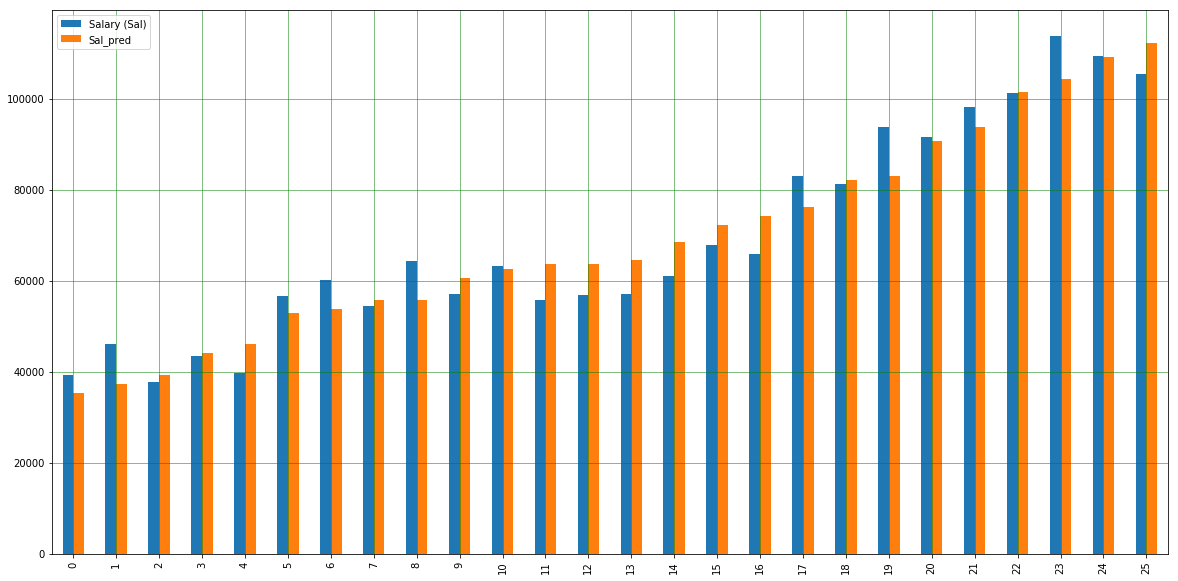

In [304]:
#plotting a bar chart of Salary(Y_train) and Sal_pred
DATA_T[["Salary (Sal)", "Sal_pred"]].plot(kind = "bar", figsize = (20, 10))
plt.grid(which = "major", linestyle = "-", linewidth = "0.5", color = "green")
plt.grid(which = "minor", linestyle = "-", linewidth = "0.5", color = "black")
plt.show()

# Que 2) What new value of y (Sal_test_pred) will the linear regression equation suggest in line with 20% split of the previous Salary?

# Ans : below

In [305]:
testing = regressor.predict(YE_test)
DATA_TT["Sal_test_pred"] = testing
DATA_TT

C:\Users\TheForbesMaterial\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,YearsExperience (YE),Salary (Sal),Sal_test_pred
26,9.5,116969.0,117117.142442
27,9.6,112635.0,118088.768092
28,10.3,122391.0,124890.147641
29,10.5,121872.0,126833.398941


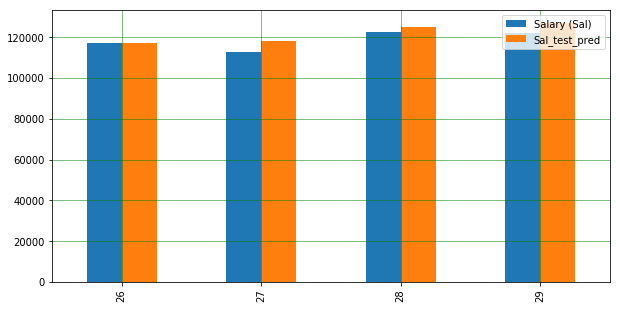

In [306]:
DATA_TT[["Salary (Sal)", "Sal_test_pred"]].plot(kind = "bar", figsize = (10, 5))
plt.grid(which = "major", linestyle = "-", linewidth = "0.5", color = "green")
plt.grid(which = "minor", linestyle = "-", linewidth = "0.5", color = "black")
plt.show()

# Que 3) How well does the regression equation fit the data?

In [307]:
RESULT = DATA_T[["Salary (Sal)", "Sal_pred"]]
RESULT.head()

,Salary (Sal),Sal_pred
0,39343.0,35500.587859
1,46205.0,37443.839158
2,37731.0,39387.090458
3,43525.0,44245.218707
4,39891.0,46188.470007


In [308]:
n = len(DATA_TT)
RESULT["Error"] = RESULT["Salary (Sal)"].subtract(RESULT["Sal_pred"])

print(RESULT)

Cost_Function = abs(RESULT["Error"]).sum()

Mean_Absolute_Error = Cost_Function / n

print("\n Cost Function = ", Cost_Function)
print("\n Mean Absolute Error = ", Mean_Absolute_Error)

    Salary (Sal)       Sal_pred         Error
0        39343.0   35500.587859   3842.412141
1        46205.0   37443.839158   8761.160842
2        37731.0   39387.090458  -1656.090458
3        43525.0   44245.218707   -720.218707
4        39891.0   46188.470007  -6297.470007
5        56642.0   52989.849555   3652.150445
6        60150.0   53961.475205   6188.524795
7        54445.0   55904.726505  -1459.726505
8        64445.0   55904.726505   8540.273495
9        57189.0   60762.854754  -3573.854754
10       63218.0   62706.106053    511.893947
11       55794.0   63677.731703  -7883.731703
12       56957.0   63677.731703  -6720.731703
13       57081.0   64649.357353  -7568.357353
14       61111.0   68535.859952  -7424.859952
15       67938.0   72422.362551  -4484.362551
16       66029.0   74365.613851  -8336.613851
17       83088.0   76308.865151   6779.134849
18       81363.0   82138.619049   -775.619049
19       93940.0   83110.244699  10829.755301
20       91738.0   90883.249898   

In [309]:
from sklearn import metrics

print("Mean Absolute Error : ", metrics.mean_absolute_error(YE_train, Y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(YE_train, Y_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(YE_train, Y_pred)))

Mean Absolute Error :  69465.51923076923
Mean Squared Error :  5306499909.262083
Root Mean Squared Error :  72845.7267742047


# Ans : The disparity between the actual Salary and the predicted salary (Sal_pred) is much and cannot be overlooked. So the regression equation does not fit the data well.

In [312]:
#USING POLYNOMIAL

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
YE_poly = poly_reg.fit_transform(YE_train)
poly_reg.fit(YE_poly, Sal_train)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [313]:
regressor_2 = LinearRegression()
regressor_2.fit(YE_poly, Sal_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [315]:
regressor_2.score(YE_poly, Sal_train)

0.9500755150795199

In [319]:
Poly_pred = regressor_2.predict(poly_reg.fit_transform(YE_train))

In [320]:
print("regression intercept = ", regressor_2.intercept_)

regression intercept =  19344.744463937648


In [328]:
plt.scatter(YE_train, Sal_train, color = "yellow")
plt.plot(YE_train, regressor_2.predict(poly_reg.fit_transform(YE_train), color = "brown")
plt.title("Using results from polynomial")
plt.xlabel("Years of Experince")
plt.ylabel("Polynomial Salary")
plt.show()

SyntaxError: invalid syntax (<ipython-input-328-78796541832a>, line 3)

In [330]:
DATA_T["Sal_Ppred"] = Poly_pred
DATA_T.head()

C:\Users\TheForbesMaterial\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,YearsExperience (YE),Salary (Sal),Sal_pred,Sal_Ppred
0,1.1,39343.0,35500.587859,38556.538064
1,1.3,46205.0,37443.839158,40741.286636
2,1.5,37731.0,39387.090458,42663.325490
3,2.0,43525.0,44245.218707,46632.467259
4,2.2,39891.0,46188.470007,47999.288766


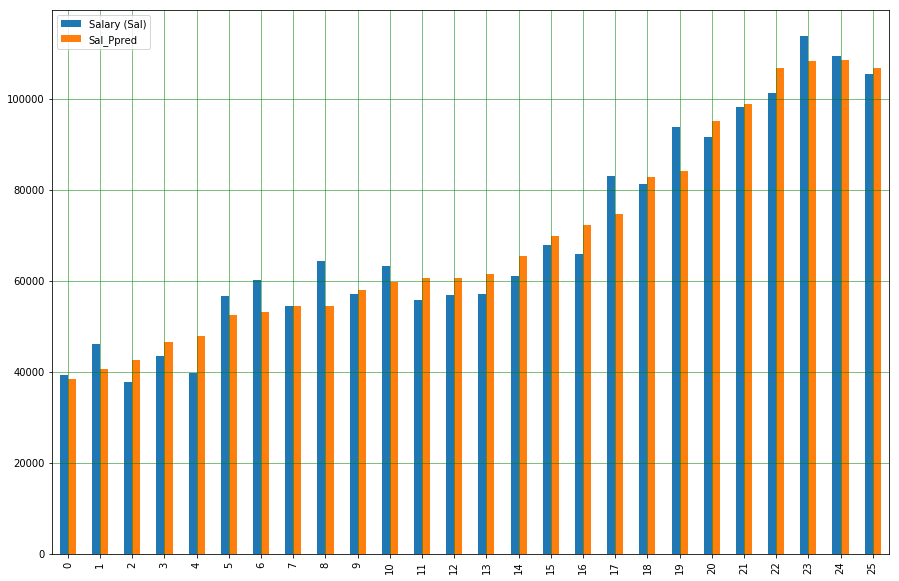

In [332]:
DATA_T[["Salary (Sal)", "Sal_Ppred"]].plot(kind = "bar", figsize = (15, 10))
plt.grid(which = "major", linestyle = "-", linewidth = "0.5", color = "green")
plt.grid(which = "minor", linestyle = ":", linewidth = "0.5", color = "black")
plt.show()

# OBSERVATION: Polynomial regression didn't improve the way the linear equation fit the data.

# What do we do in a case like this?